In [1]:
import pandas as pd
from statsmodels.stats.proportion import proportions_ztest
from scipy import stats
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv("website_ab_test.csv")
print(data.head())

         Theme  Click Through Rate  Conversion Rate  Bounce Rate  \
0  Light Theme            0.054920         0.282367     0.405085   
1  Light Theme            0.113932         0.032973     0.732759   
2   Dark Theme            0.323352         0.178763     0.296543   
3  Light Theme            0.485836         0.325225     0.245001   
4  Light Theme            0.034783         0.196766     0.765100   

   Scroll_Depth  Age   Location  Session_Duration Purchases Added_to_Cart  
0     72.489458   25    Chennai              1535        No           Yes  
1     61.858568   19       Pune               303        No           Yes  
2     45.737376   47    Chennai               563       Yes           Yes  
3     76.305298   58       Pune               385       Yes            No  
4     48.927407   25  New Delhi              1437        No            No  


In [3]:
#check null values
print(data.isnull().sum())

Theme                 0
Click Through Rate    0
Conversion Rate       0
Bounce Rate           0
Scroll_Depth          0
Age                   0
Location              0
Session_Duration      0
Purchases             0
Added_to_Cart         0
dtype: int64


In [4]:
#column insights
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Theme               1000 non-null   object 
 1   Click Through Rate  1000 non-null   float64
 2   Conversion Rate     1000 non-null   float64
 3   Bounce Rate         1000 non-null   float64
 4   Scroll_Depth        1000 non-null   float64
 5   Age                 1000 non-null   int64  
 6   Location            1000 non-null   object 
 7   Session_Duration    1000 non-null   int64  
 8   Purchases           1000 non-null   object 
 9   Added_to_Cart       1000 non-null   object 
dtypes: float64(4), int64(2), object(4)
memory usage: 78.3+ KB
None


In [5]:
#descriptive statistics of the data
print(data.describe())

       Click Through Rate  Conversion Rate  Bounce Rate  Scroll_Depth  \
count         1000.000000      1000.000000  1000.000000   1000.000000   
mean             0.256048         0.253312     0.505758     50.319494   
std              0.139265         0.139092     0.172195     16.895269   
min              0.010767         0.010881     0.200720     20.011738   
25%              0.140794         0.131564     0.353609     35.655167   
50%              0.253715         0.252823     0.514049     51.130712   
75%              0.370674         0.373040     0.648557     64.666258   
max              0.499989         0.498916     0.799658     79.997108   

               Age  Session_Duration  
count  1000.000000       1000.000000  
mean     41.528000        924.999000  
std      14.114334        508.231723  
min      18.000000         38.000000  
25%      29.000000        466.500000  
50%      42.000000        931.000000  
75%      54.000000       1375.250000  
max      65.000000       1797.

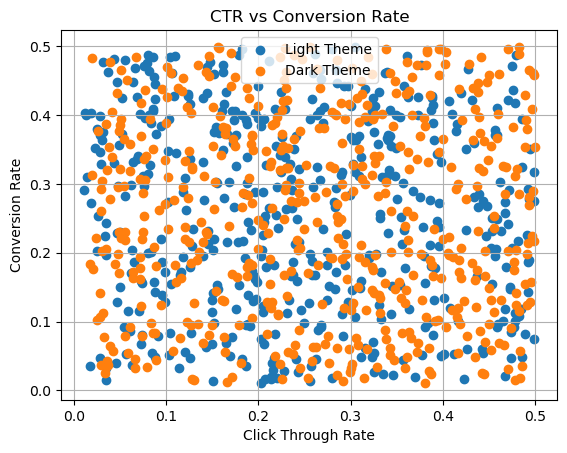

In [6]:
# Scatter plot for Click Through Rate and Conversion Rate
plt.figure()
for theme in data['Theme'].unique():
    subset = data[data['Theme'] == theme]
    plt.scatter(subset['Click Through Rate'], subset['Conversion Rate'], label=theme)
plt.title('CTR vs Conversion Rate')
plt.xlabel('Click Through Rate')
plt.ylabel('Conversion Rate')
plt.legend()
plt.grid(True)
plt.savefig('scatter_plot_matplotlib.png')
plt.show()

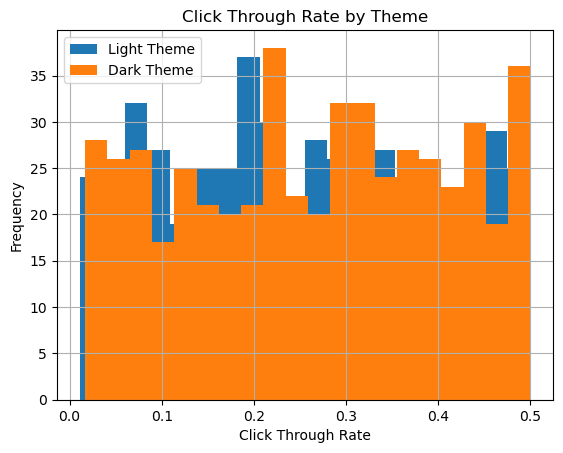

In [7]:
#Histogram of the CTR of both themes(Light & Dark)

plt.figure()
plt.hist(data[data['Theme'] == 'Light Theme']['Click Through Rate'], bins=20,label='Light Theme')
plt.hist(data[data['Theme'] == 'Dark Theme']['Click Through Rate'], bins=20, label='Dark Theme')
plt.title('Click Through Rate by Theme')
plt.xlabel('Click Through Rate')
plt.ylabel('Frequency')
plt.legend()
plt.grid(True)
plt.savefig('histogram_plot_matplotlib.png')
plt.show()

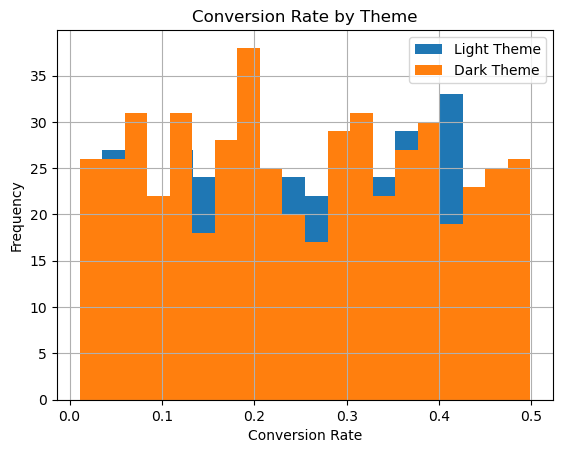

In [9]:
#Histogram of the conversion rates of both themes(Light & Dark)
# Histogram of Conversion Rate
plt.figure()
plt.hist(data[data['Theme'] == 'Light Theme']['Conversion Rate'], bins=20,  label='Light Theme')
plt.hist(data[data['Theme'] == 'Dark Theme']['Conversion Rate'], bins=20, label='Dark Theme')
plt.title('Conversion Rate by Theme')
plt.xlabel('Conversion Rate')
plt.ylabel('Frequency')
plt.legend()
plt.grid(True)
plt.savefig('conversion_rate_histogram_matplotlib.png')
plt.show()

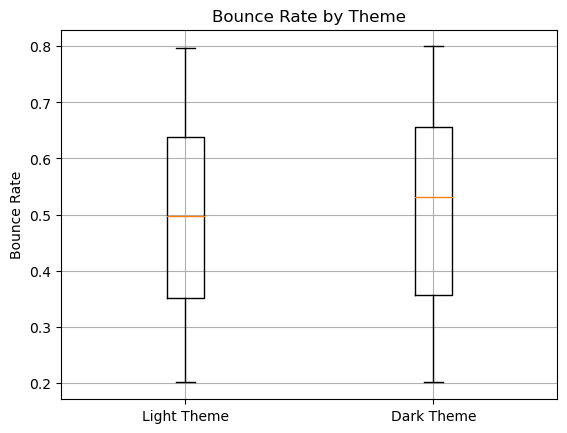

In [10]:
#Distribution of the bounce rates of both themes(Light & Dark)
plt.figure()
plt.boxplot([data[data['Theme'] == 'Light Theme']['Bounce Rate'], 
             data[data['Theme'] == 'Dark Theme']['Bounce Rate']],
            labels=['Light Theme', 'Dark Theme'])
plt.title('Bounce Rate by Theme')
plt.ylabel('Bounce Rate')
plt.grid(True)
plt.savefig('bounce_rate_boxplot_matplotlib.png')
plt.show()

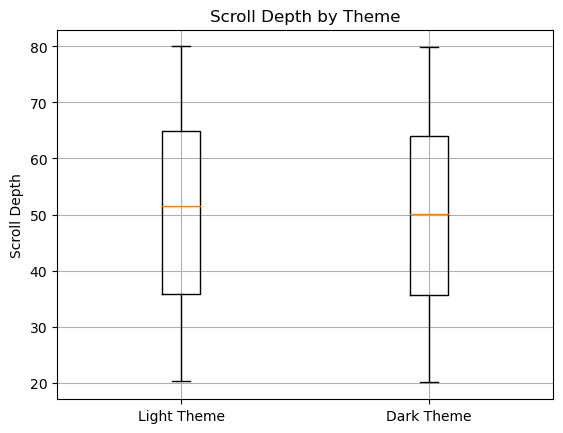

In [11]:
# Distribution of the scroll depth of both themes
plt.figure()
plt.boxplot([data[data['Theme'] == 'Light Theme']['Scroll_Depth'], 
             data[data['Theme'] == 'Dark Theme']['Scroll_Depth']],
            labels=['Light Theme', 'Dark Theme'])
plt.title('Scroll Depth by Theme')
plt.ylabel('Scroll Depth')
plt.grid(True)
plt.savefig('scroll_depth_boxplot_matplotlib.png')
plt.show()

In [ ]:
#Comparison of Both Themes based on Purchases
# using two-sample z test


light_theme_conversions = light_theme_data[light_theme_data['Purchases'] == 'Yes'].shape[0]
light_theme_total = light_theme_data.shape[0]

dark_theme_conversions = dark_theme_data[dark_theme_data['Purchases'] == 'Yes'].shape[0]
dark_theme_total = dark_theme_data.shape[0]

conversion_counts = [light_theme_conversions, dark_theme_conversions]
sample_sizes = [light_theme_total, dark_theme_total]

light_theme_conversion_rate = light_theme_conversions / light_theme_total
dark_theme_conversion_rate = dark_theme_conversions / dark_theme_total



In [ ]:
# Perform two-sample proportion test
zstat, pval = proportions_ztest(conversion_counts, sample_sizes)
print("Light Theme Conversion Rate:", light_theme_conversion_rate)
print("Dark Theme Conversion Rate:", dark_theme_conversion_rate)
print("Two Sample z Test - z-statistic:", zstat, " p-value:", pval)

In [ ]:
# Comparison of Both Themes based on Session Duration
# using two-sample t test

light_theme_session_duration = light_theme_data['Session_Duration']
dark_theme_session_duration = dark_theme_data['Session_Duration']

In [ ]:
# Calculate the average session duration for both themes
light_theme_avg_duration = light_theme_session_duration.mean()
dark_theme_avg_duration = dark_theme_session_duration.mean()

print("Light Theme Average Session Duration:", light_theme_avg_duration)
print("Dark Theme Average Session Duration:", dark_theme_avg_duration)


In [ ]:
# Perform two-sample t-test for session duration
tstat, pval = stats.ttest_ind(light_theme_session_duration, dark_theme_session_duration)
print("Two Sample t Test - t-statistic:", tstat, " p-value:", pval)

### Conclusion
From the A/B testing conducted, both the Light Theme and the Dark Theme show minor differences in performance metrics such as conversion rates and session duration. However, these differences are not statistically significant. This implies that there is no strong evidence to prefer one theme over the other based on the current data.